The objective of this project is learn about create a machine learning code to identify images from a pet's gallery
mixed with cats and dog photos

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plp
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
trainD = "D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/train"
testD = "D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/test"
validation = "D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/validation"

Preprocessing

As first part of this project, we need to:
1- Read the pictures files
2- Decode the type files
3- Convert into tensors
4- Rescale

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

In [10]:
#This section is focused on training data model, choosing a sample from previous called datasets.
#In this case a sample of 20 photos. Also this code represents a transformation data through tensorflow library 

traindatagen = IDG(rescale=1./255)
testdatagen = IDG(rescale=1./255)

traingen = traindatagen.flow_from_directory(trainD, target_size=(150,150), batch_size = 20, class_mode = "binary")
validationgen = testdatagen.flow_from_directory(testD, target_size=(150,150), batch_size = 20, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [16]:
#As the intention of this project is realize the process through a neural network, we'll continue
#generating a network model with the next characteristics 

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [18]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics=["acc"])

In [20]:
history = model.fit_generator(traingen, steps_per_epoch=100, epochs = 20, validation_data = validationgen, validation_steps = 50)

<ipython-input-20-d198d9054cf6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(traingen, steps_per_epoch=100, epochs = 20, validation_data = validationgen, validation_steps = 50)


Epoch 1/20
100/100 [==============================] - 96s 925ms/step - loss: 0.6875 - acc: 0.5360 - val_loss: 0.6726 - val_acc: 0.5760
Epoch 2/20
100/100 [==============================] - 69s 689ms/step - loss: 0.6508 - acc: 0.6210 - val_loss: 0.6316 - val_acc: 0.6510
Epoch 3/20
100/100 [==============================] - 69s 690ms/step - loss: 0.6005 - acc: 0.6790 - val_loss: 0.6153 - val_acc: 0.6620
Epoch 4/20
100/100 [==============================] - 70s 700ms/step - loss: 0.5662 - acc: 0.7060 - val_loss: 0.5812 - val_acc: 0.7150
Epoch 5/20
100/100 [==============================] - 71s 713ms/step - loss: 0.5303 - acc: 0.7260 - val_loss: 0.6296 - val_acc: 0.6570
Epoch 6/20
100/100 [==============================] - 76s 758ms/step - loss: 0.5069 - acc: 0.7470 - val_loss: 0.5462 - val_acc: 0.7190
Epoch 7/20
100/100 [==============================] - 86s 863ms/step - loss: 0.4874 - acc: 0.7620 - val_loss: 0.5854 - val_acc: 0.6980
Epoch 8/20
100/100 [==============================] - 8

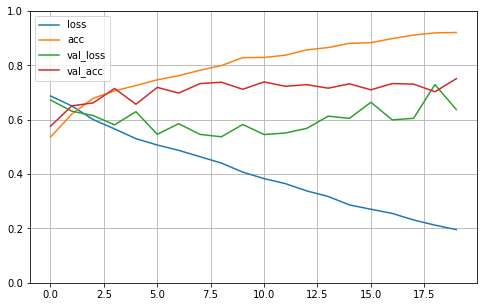

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plp.grid(True)
plp.gca().set_ylim(0, 1)
plp.show()

In [25]:
model.save("model.h5")

In [26]:
from tensorflow.keras import backend as K
K.clear_session()
del model